In [1]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# Regression
- It is a statistical process to estimate the relationship between <b>independent variables</b> (input/predictor) and a <b>dependent variable</b> (outcome).
- It is widely used in price related analysis inlcude sales forecast, housing prices prediction, 
- Generally there are two types of regressions: <b>linear regression</b> and <b>non-linear regression</b>.

# Linear Regression
- It finds the <b>best-fit line/plate</b> of a group of data points. 
- A <b>simple linear regression</b> has one independent variable only.
- A <b>multiple linear regression</b> involves two or more independent variables.
- Advantages include <b>fast to train</b> and <b>highly interpretable</b>.

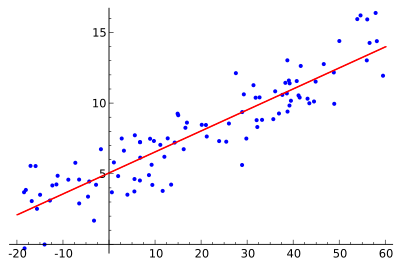

In [2]:
# visualization of simple linear regression
display.Image('img/2_simple_linear_regression_graph.png', width=400)

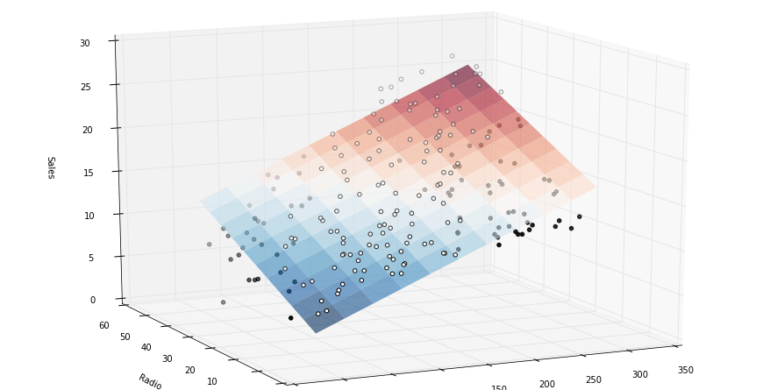

In [3]:
# visualization of multiple linear regression
display.Image('img/2_multiple_linear_regression_graph.png', width=600)

# Mathematical Details

## Formulation 
-  For simple linear regression, the formula is given by

$$\hat{y} = \beta_0 + \beta_1x_1$$ 

-  For multiple linear regression, the formula is given by $$\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$$ 

   where $\hat{y}$ is the predicted value, $x_i$ is the independent variable, $\beta_i$ are the predicted weights/coefficients of each independent variable


- $\beta_0$ is the <b>intercept</b>, it approximates the output when the input value is zero.


- The main point of regression is to find a set of coefficients that <b>minimize the cost function/error function</b>, which is the <b>deviation between the known target and the regression prediction</b>, calculated by certain method.


- The cost function used in linear regression is <b>mean square error (MSE)</b>, which is defined by $$\frac{1}{N}\sum_{i=1}^{N}(y_i-\hat{y_i})^{2}$$where $N$ is the number of training data.


## Solving Methods
- There are two ways to find the optimal cofficients: <b>Ordinary Least Square (OLS)</b> and <b>Gradient Descent</b>.
- OLS involves the classical way of <b>considering zeros of partial differentiations to find the minimum point</b> of an error function.
- On the other hand, gradient descent is an <b>iterative process</b> of minimizing the cost function by assigning the coefficients to an initial value, then use the first data point to calculate the error function, update the coefficients according to the magnitude of error, and repeat the above iteration with new data points until the error converges.
- <b>Gradient descent</b> is more practical with high dimensional data of large size, as the matrix computations become very expensive in OLS in this situation.

### Gradient Descent
- The idea of gradient descent:
    1. Guess an initial weight vector $\beta_0$ that gives minimal cost function
    2. Find the gradient vector of the cost function at that point: $\frac{\partial J}{\partial \beta}(\beta_0)$
    3. Assign new weight $\beta_1 = \beta_0 - \alpha\frac{\partial J}{\partial \beta}(\beta_0)$, where $\alpha$ is the learning rate, a hyperparameter to control the step size, which is a constant here
    4. According to the theorem of gradient descent, $J(w)$ decreases the fastest if one goes from $\beta_0$ in the direction of negative gradient of $J$ at $\beta_0$, so $J(\beta_1) \le J(\beta_0)$
    5. Repeat the above process and according to the theorem again, if $J(w)$ is a convex function, then it will converge to the global minimum, i.e. minimizing the cost function $J(w)$ at $\beta_k$ for some $k$

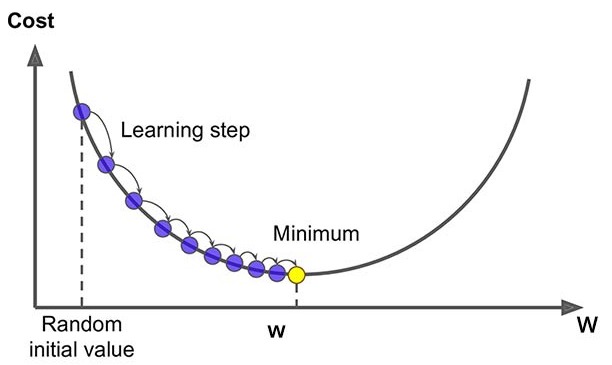

In [4]:
# a simple case with 1d weight w
display.Image('img/2_gradient_descent.png', width=450)

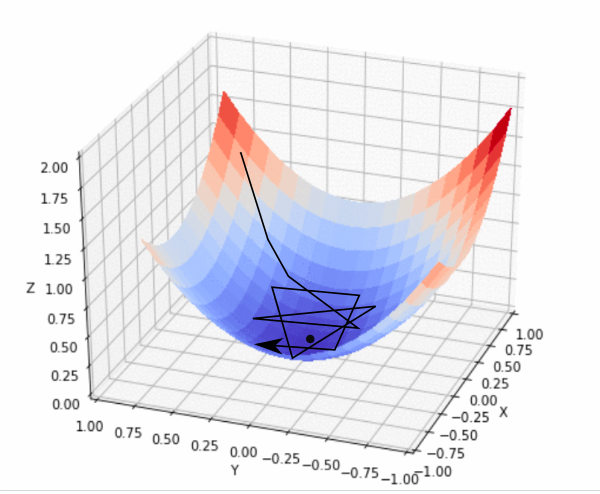

In [5]:
# this one more like acutal cases
display.Image('img/2_gradient_descent_3d.png', width=450)

- Note that the <b>maximum number of iterations</b> in gradient descent/other optimatization algorithms needs to be considered when modelling a problem. If it is too small, the algorithm may reach a solution far from the optimal one.
- The <b>learning rate $\alpha$</b> also needs to be tuned. When it is too small, it takes too long to reach the minimum. When it is too large, it may jump over the minimum and cause divergence. 

A dynamic stimulation of gradient descent: https://developers.google.com/machine-learning/crash-course/fitter/graph

# Linear Regression with sckit-learn
- The implementation of <b>sklearn.linear_model.LinearRegression</b> use OLS method, if one wants to do it by gradient descent, use <b>sklearn.linear_model.SGDRegressor</b> instead.

## Simple Linear Regression

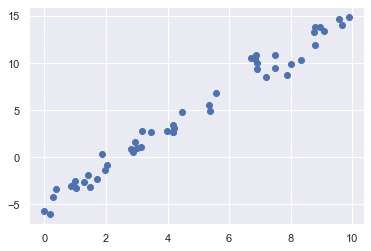

In [6]:
# generate data points
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)    # stimulate target values with randoness
plt.scatter(x, y);

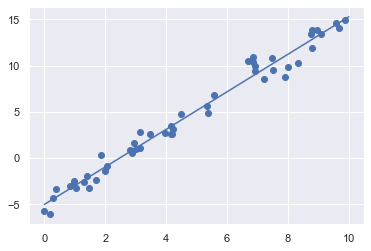

In [7]:
# train LR model and predict with new data
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [8]:
# get the coefficients of the model
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


To determine how well the line fit the training data, one could calculate the <b>coefficient of determination/R-squared</b>, denoted by $R^2$, which <b>measures the proportion of the variance in the dependent variable (y) that is predictable from the independent variables (x)</b>. It is a <b>relative</b> (relative to the baseline average model) measure of how good a model fits the data.
- To define $R^2$, first we hava to define two terms: <b>total sum of squares</b> and <b>residual sum of squares</b>.
- Let $y_1, y_2,..., y_n$ be the y-values of data, $f_1, f_2,..., f_n$ be the predicted values by the line, $\bar{y}$ be the mean of y-values.
- The <b>total sum of squares</b> $SS_{\text{tot}} = \sum_{i}(y_i-\bar{y})^2$ which is proportional to the variance of the data.
- The <b>residual sum of squares</b> $SS_{\text{res}} = \sum_{i}(y_i-f_i)^2$ which is the sum of square differences between true value and predicted value
- The coefficient of determination is defined by 
$$R^2 = 1-\frac{SS_{\text{res}}}{SS_{\text{tot}}}$$
- The coefficient ranges from $
-inf$ to 1. 
    <ol>
        <li>When $R^2=1$, the model predicts the data perfectly.</li>
        <li>When $R^2=0$, the model performs the same as the baseline (average) model $y=\bar{y}$.</li>
        <li>When $R^2<0$, the model performs worse than the baseline model.</li>
    </ol>

In [9]:
# The coefficient R^2 
print(f"Model score = {model.score(x[:, np.newaxis], y)}")

Model score = 0.9790800609430612


## Multiple Linear Regression
- linear regression with <b>more than one independent variables</b>

In [10]:
# create training data points
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
print(X.shape)
print(y.shape)

(100, 3)
(100,)


In [11]:
# train LR model and print coefficients
model.fit(X, y)
print("Model weigths:    ", model.coef_)
print("Model intercept:    ", model.intercept_)

Model weigths:     [ 1.5 -2.   1. ]
Model intercept:     0.5000000000000144


In [12]:
# The coefficient R^2 
print(f"Model score = {model.score(X, y)}")

Model score = 1.0


The model score is perfect because we generate the data linearly.

## Basis Function Regression
- Input variables can be <b>transformed by a basis function</b> to create more 'new' variables which could <b>better fit nonlinear relationships</b> 
- It is <b>still a linear model</b> as it is a linear combination (i.e. in the form of $ax+by$) of variables.
- The choice of basis function depends on distribution of data points of specific dataset, there is no limit on which function should or should not be used.   

### Polynomial basis function
- Let's take a simple linear regression as an example, we could apply the function $f(x) = x^n$ to transform the regression to

$$ \hat{y} = \beta_0 + \beta_1x + \beta_2x^2 + ... + \beta_nx^n $$

In [13]:
# use f(x) = x^3 as basis function
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

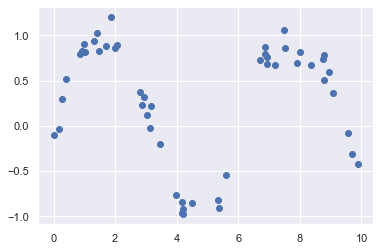

In [14]:
# create data points which is sine-like
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.15 * rng.randn(50)
plt.scatter(x, y);

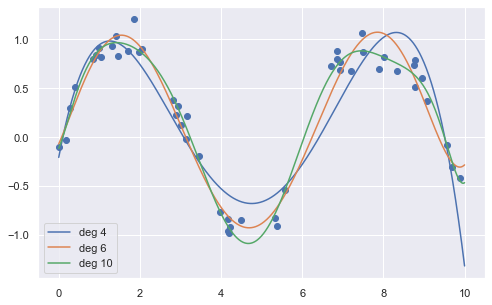

In [15]:
# make a pipeline of polynomial feature transform followed by linear regression
# to train a model that fits the sine-like data points
from sklearn.pipeline import make_pipeline
plt.figure(figsize=(8, 5))
plt.scatter(x, y)

xfit = np.linspace(0, 10, 1000)
# polynomial regression with degree 4, 6, and 10
for i in [4, 6, 10]:
    poly_model = make_pipeline(PolynomialFeatures(i),
                               LinearRegression())
    poly_model.fit(x[:, np.newaxis], y)
    xfit = np.linspace(0, 10, 1000)
    yfit = poly_model.predict(xfit[:, np.newaxis])
    plt.plot(xfit, yfit, label=f'deg {i}');
plt.legend();

One can see that the higher the degree of a polynomial function, the better the regression line fits the points, the more likely it is <b>overfitting</b>.

### Gaussian basis function
- The Gaussian function is given by $$\phi(x) = \text{exp}(-\frac{(x-\mu)^2}{2\sigma})$$ 

    where $\mu$ and $\sigma$ are mean and variance respectively.
  
- One can <b>vary mean and variance</b> of a Gaussian function to generate a bell-shaped curve with <b>varying centre and width<b>.

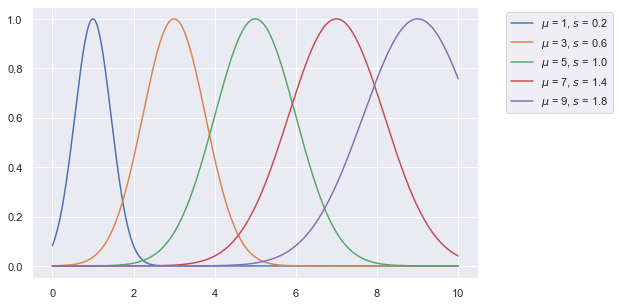

In [16]:
# what Gaussian function with different mean and sd looks like
# define basis fcn
def gaussian_basis(x, mu, sigma):
    return np.exp(-0.5*(x-mu)**2/sigma)

# draw Gaussian function of various centre and width
plt.figure(figsize=(8, 5))
xfit = np.linspace(0, 10, 1000)
for i in range(1, 10, 2):
    mu = i
    s = i/5
    yfit = gaussian_basis(xfit, mu, s)
    plt.plot(xfit, yfit, label=f'$\mu$ = {mu}, $s$ = {s}');
plt.legend(bbox_to_anchor=(1.05, 1));

In [17]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

# build GaussianFeatures subclass based on BaseEstimator and TransformerMixin class in sklearn
# BaseEstimator to inherit get_params() and set_parms() fcns
# TransformerMixin to inherit fit_transform()
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers evenly spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:,:, np.newaxis], self.centers_, self.width_, axis=1)

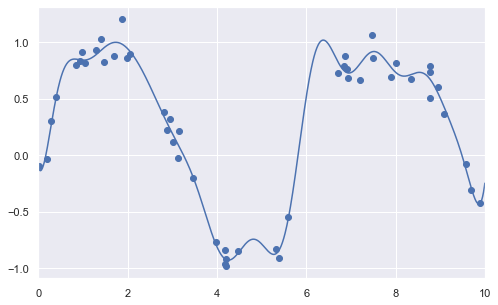

In [18]:
# approximate data points by 20 Gaussian fcns
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.figure(figsize=(8, 5))
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

# Regularization
- The idea is to <b>add constraint to the cost function to restrict the magnitude of coefficients/weights estimated</b> so to reduce model complexity 

## Ridge Regression / L2 Regularization
- The cost function for ridge regression is altered as follow: 
$$\frac{1}{N}(\sum_{i=1}^{N}(y_i-\hat{y_i})^{2} + \frac{\alpha}{2} \sum_{i=1}^{N}{\beta_i}^2)$$ where $0 <\alpha < \infty$ is the <b>regularization parameter</b>.

- A regularization parameter is one of the <b>hyperparameters</b> which controls the learning process, is determined by <b>cross-validation</b>.
- $\alpha$ controls the <b>strength of penalty</b>.
- In other words, a summation for square of coefficients is added to the original cost function to <b>penalize large coefficients</b>.
- Mathematically, ridge regression <b>does not reduce the number of variables</b>, i.e. $\beta_i$ will not be zero for all $i$. It does not eliminate coefficient of feature that is actually irrelevant. 

In [19]:
def plot_model(models):
    plt.figure(figsize=(8, 5))
    plt.xlim(0, 10)
    plt.scatter(x, y)
    for model in models:
        model.fit(x[:, np.newaxis], y)
        xfit = np.linspace(0, 10, 1000)
        yfit = model.predict(xfit[:, np.newaxis])
        plt.plot(xfit, yfit, label=f'{model.steps[1][0]}')
    plt.legend()

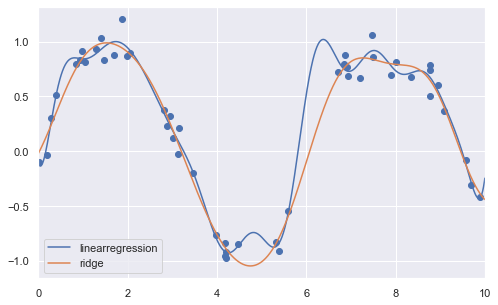

In [20]:
# The large the alpha, the stronger the damping effect
from sklearn.linear_model import Ridge
ridge_model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
plot_model([gauss_model, ridge_model])

## Lasso Regression / L1 Regularization
- Lasso stands for <b>l</b>east <b>a</b>bsolute <b>s</b>hrinkage and <b>s</b>election <b>o</b>perator.
- The cost function is given by:
$$\frac{1}{N}(\sum_{i=1}^{N}(y_i-\hat{y_i})^{2} + \alpha\sum_{i=1}^{N}\lvert{\beta_i}\rvert)$$ where $0 <\alpha < \infty$ is the <b>regularization parameter</b>.

- <b>1-norm</b> is used instead of 2-norm in the penalty of Lasso regression. It <b>penalizes coefficients equally</b>.
- Mathematically, lasso regression <b>could shrink some of the coefficients with high collinearity to zero</b> due to the nature of L1-norm, thereby performing <b>feature selection</b>. 
- <b>Multicollinearity</b> is the situation that some dependent variables are linearly correlated with others. If two variables are multcollinear, lasso <b>might randomly choose one and eliminate the other</b> without understanding the context >> less interpretable and removing relevant variables.

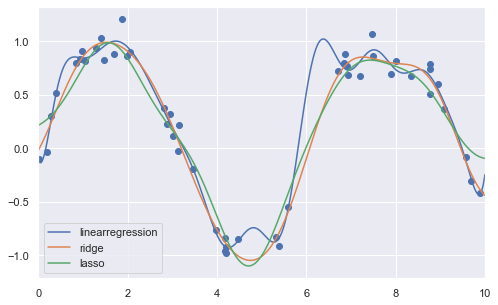

In [21]:
from sklearn.linear_model import Lasso
lasso_model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.01))    # if alpha is large enough, some coefficients are shrinked to zeros
plot_model([gauss_model, ridge_model, lasso_model])

In short, there is <b>no better between Ridge and Lasso regression</b>, the usage depends on circumstances:
- If there are only smaller no. of predictors that actually influences the outcome, then use Lasso.
- If most predictors have similar influences on the outcome, then use Ridge.
- <b>Elastic net</b>, which is <b>a combination of Ridge and Lasso</b>, predict better than Lasso but still performing feature selection.

## Elastic Net
- The cost function is given by $$\frac{1}{2N}\sum_{i=1}^{N}(y_i-\hat{y_i})^{2} + \alpha[\frac{\gamma}{2}\sum_{i=1}^{N}{\beta_i}^{2} + (1-\gamma)\sum_{i=1}^{N}\lvert{\beta_i}\rvert]$$

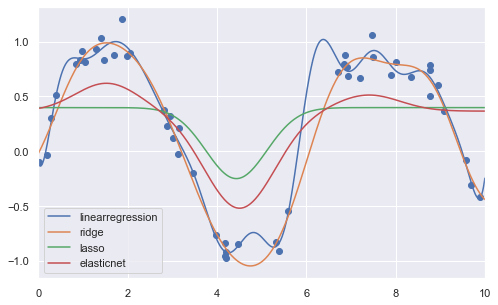

In [22]:
from sklearn.linear_model import ElasticNet
# For l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty
lasso_model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.1))
elastic_model = make_pipeline(GaussianFeatures(30), ElasticNet(alpha=0.1, l1_ratio=0.5)) 
plot_model([gauss_model, ridge_model, lasso_model, elastic_model])